## Exercise 2-2: Comparison between iTEBD and TRG for 2d Ising model
2023, March, Tsuyoshi Okubo

This code simulate 2d Ising model on the square lattice, whose Hamiltonian is given by
 $$ \mathcal{H} = -J \sum_{\langle i,j\rangle} S_i S_j$$
where $S_i = \pm 1$. 

We will calculate the free energy density, $f$, of the system based on infinite Time Evolving Block Decimation (iTEBD) described in R. Orus and G. Vidal Phys. Rev. B 78, 155117 (2008).

The implementation of the algorithm is taken github repository https://github.com/TsuyoshiOkubo/classical_iTEBD

Here we compare the errors of the free energy density in iTEBD and TRG. In the case of TRG, sufficiently large $L = 2^n$ is considered as an approximation of the infinite system.

#### Parameters for iTEBD simulations
* chi_max: the maxmum bond dimenison in iMPS.
* max_itr: the maxumn number of the iteration to calculate the eigenvector for the largest eigenvalue. 
* seed: the seed for random number generator used for preparing the initial iMPS. 

#### Parameters for TRG simulations
* n: size of the system which corresponds to $L = 2^n$ for $L\times L$ square lattice.
* D: Bond dimension. It is used as maximum value to keep at the low rank apporximation based on SVD. 


In [6]:
import numpy as np
try:
    import classical_iTEBD_lib
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/classical_iTEBD_lib.py
    import classical_iTEBD_lib
try:
    import TRG_lib
except ImportError:
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/TRG_lib.py
    import TRG_lib

import pickle
import os

%matplotlib inline
from matplotlib import pyplot

In [7]:
Tc = 2.0/np.log(1.0+np.sqrt(2.0)) ## The critical temperature of the Ising model 

T = 0.9 * Tc ## Temperature 

### for iTEBD ###
chi_max_list = [4, 6, 8, 10, 12, 14, 16] ## bond dimensions for iTEBD
max_itr = 200 ## maxmun number of iteration for iTEBD
seed = 13 ## seed for random number generator used for preparing initial tenors

### for TRG ###
n = 20 ## L = 2^n. Note that n must be sufficiently large 
D_list = [4, 6, 8, 10, 12, 14, 16] ## bond dimensions for TRG

L = 2**n
TRG_step = 2*n -1

## output files
data_file_iTEBD = "iTEBDdata_ex2-2.dat" ## Simulation data will be seved to this file.
data_file = "trgdata_ex2-2_n"+repr(n)+".dat" ## Simulation data will be seved to this file.


In [8]:
%%time
## iTEBD simulation
free_energy_density = []
mag = []
xi = []
f_ex = []
mag_ex = []
for chi_max in chi_max_list:
    f_temp, mag_temp, xi_temp, f_ex_temp, mag_ex_temp = classical_iTEBD_lib.iTEBD_Square_Ising(T,chi_max,seed=seed,max_itr=max_itr)
    free_energy_density.append(f_temp)
    mag.append(mag_temp)
    xi.append(xi_temp)
    f_ex.append(f_ex_temp)
    mag_ex.append(mag_ex_temp)

## calculation has finised at 53 steps
T, free_energy_density, exact value = 2.04226678279172 -2.0583867438875796 -2.0583867640251055
T, magnetization, exact value = 2.04226678279172 -0.8959403354704255 0.8959375370799653
## calculate correlation length
T, correlation lenght 2.04226678279172 1.7597004266052123
## calculation has finised at 56 steps
T, free_energy_density, exact value = 2.04226678279172 -2.0583867639644144 -2.0583867640251055
T, magnetization, exact value = 2.04226678279172 -0.8959375529462229 0.8959375370799653
## calculate correlation length
T, correlation lenght 2.04226678279172 2.0864862339401693
## calculation has finised at 58 steps
T, free_energy_density, exact value = 2.04226678279172 -2.05838676402456 -2.0583867640251055
T, magnetization, exact value = 2.04226678279172 -0.8959375372486682 0.8959375370799653
## calculate correlation length
T, correlation lenght 2.04226678279172 2.2480891524387956
## calculation has finised at 58 steps
T, free_energy_density, exa

In [9]:
%%time
## TRG simulation
free_energy_density_trg = []
for D in D_list:
    free_energy_density_trg.append(TRG_lib.TRG_Square_Ising(T,D,TRG_step,Energy_flag=False))


T, free_energy_density = 2.04226678279172 -2.0577209347338945
T, free_energy_density = 2.04226678279172 -2.0583075284209564
T, free_energy_density = 2.04226678279172 -2.058376708367407
T, free_energy_density = 2.04226678279172 -2.0583805547492813
T, free_energy_density = 2.04226678279172 -2.058381513834552
T, free_energy_density = 2.04226678279172 -2.0583842797202134
T, free_energy_density = 2.04226678279172 -2.0583850440743987
CPU times: user 13.9 s, sys: 4.55 s, total: 18.4 s
Wall time: 2.57 s


In [20]:
## save data for iTEBD
f = open(data_file_iTEBD,"wb")
obs_list_all = [free_energy_density, mag, xi, f_ex, mag_ex, chi_max_list, T]
pickle.dump(obs_list_all,f)
f.close

## save data for TRG
f = open(data_file,"wb")
obs_list_all = [free_energy_density_trg, D_list, T]
pickle.dump(obs_list_all,f)
f.close

<function BufferedWriter.close>

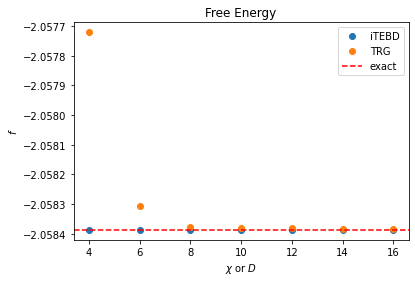

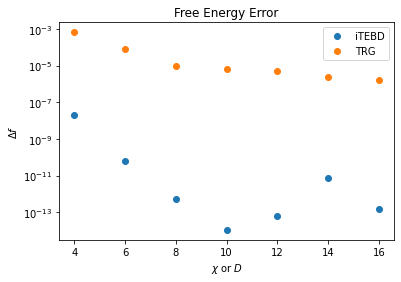

In [21]:
## plot observables
pyplot.figure()
pyplot.title("Free Energy")
pyplot.xlabel("$\\chi$ or $D$")
pyplot.ylabel("$f$")
pyplot.plot(chi_max_list,free_energy_density,"o",label = "iTEBD")
pyplot.plot(D_list,free_energy_density_trg,"o",label = "TRG")
pyplot.axhline(f_ex[0], 0, 1,c="red", linestyle='dashed', label="exact")
pyplot.legend()

pyplot.figure()
pyplot.title("Free Energy Error")
pyplot.xlabel("$\\chi$ or $D$")
pyplot.ylabel("$\\Delta f$")
pyplot.plot(chi_max_list,np.abs(free_energy_density - f_ex[0]),"o",label = "iTEBD")
pyplot.plot(D_list,np.abs(free_energy_density_trg-f_ex[0]),"o",label = "TRG")
pyplot.yscale("log")
pyplot.legend()

